# Cleaning Text Data

## Loab Data and Libraries

In [1]:
import matplotlib.pyplot as plt 
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.model_selection import train_test_split

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [2]:
df = pd.read_csv("review_data_new.csv")
df_cleaned = df.dropna(subset=["star_rating","review_text"])

## Map star rating to sentiment class

Number of rows per star rating:
2    17996
1    14874
0    13876
Name: sentiment, dtype: int64


/var/folders/66/n0_9mny57ys5rqmlmylz_2880000gn/T/ipykernel_4731/960358392.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'] = [ map_sentiment(x) for x in df_cleaned['star_rating']]


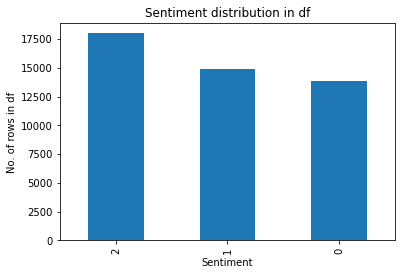

In [3]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 3:
        return 0
    elif stars_received <= 4:
        return 1
    else:
        return 2
# Mapping stars to sentiment into three categories
df_cleaned['sentiment'] = [ map_sentiment(x) for x in df_cleaned['star_rating']]
print("Number of rows per star rating:")
print(df_cleaned['sentiment'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df_cleaned['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [4]:
df.shape

(50079, 8)

## Emoji distribution and replacement

In [20]:
import pandas as pd
import re

# Assuming you have a DataFrame df with a column 'review_text'
# Replace 'your_dataset.csv' with the actual file or provide your own dataset
# df = pd.read_csv('your_dataset.csv')

def count_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   "\U0001F600-\U0001F64F"
                                   "\U0001F300-\U0001F5FF"
                                   "\U0001F680-\U0001F6FF"
                                   "\U0001F700-\U0001F77F"
                                   "\U0001F780-\U0001F7FF"
                                   "\U0001F800-\U0001F8FF"
                                   "\U0001F900-\U0001F9FF"
                                   "\U0001FA00-\U0001FA6F"
                                   "\U0001FA70-\U0001FAFF"
                                   "\U00002702-\U000027B0"
                                   "\U000024C2-\U0001F251" 
                                   "]+", flags=re.UNICODE)
        emojis = re.findall(emoji_pattern, text)
        return emojis
    else:
        return []

# Apply the count_emojis function to the 'review_text' column
df['emojis'] = df['review_text'].apply(count_emojis)

# Flatten the list of emojis into a single list
all_emojis = [emoji for emojis in df['emojis'] for emoji in emojis]

# Create a DataFrame with counts of each emoji
emoji_counts = pd.Series(all_emojis).value_counts().reset_index()
emoji_counts.columns = ['emoji', 'count']

# Display the DataFrame with counts of each emoji
print(emoji_counts)


       emoji  count
0          ✨    889
1         ⭐️    825
2          😭    599
3          ★    491
4          ⭐    427
...      ...    ...
8026  𝙬𝙖𝙣𝙩𝙚𝙙      1
8027       💤      1
8028       ꜰ      1
8029      💕💋      1
8030     👍👏👎      1

[8031 rows x 2 columns]


In [7]:
import pandas as pd
import emoji

def convert_emoji_to_text(emoji_text):
    # Check if the input is a string
    if isinstance(emoji_text, str):
        # Convert emojis to text and add space before and after each
        text_with_spaces = emoji.demojize(emoji_text, delimiters=(' ', ' '))
        return text_with_spaces
    else:
        # If it's not a string, return the original value
        return emoji_text

def replace_emojis_in_column(df, column_name):
    # Convert the column to strings before applying the function
    df[column_name] = df[column_name].astype(str)
    
    # Apply the convert_emoji_to_text function to the 'review_text' column
    df[column_name] = df[column_name].apply(convert_emoji_to_text)
    
    return df

# Replace emojis in the 'review_text' column with spaces before and after
df_cleaned_1 = replace_emojis_in_column(df_cleaned, 'review_text')



/var/folders/66/n0_9mny57ys5rqmlmylz_2880000gn/T/ipykernel_4731/3233837449.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype(str)
/var/folders/66/n0_9mny57ys5rqmlmylz_2880000gn/T/ipykernel_4731/3233837449.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(convert_emoji_to_text)


In [9]:
print(df_emoji.head(1)['review_text'].iloc[0])

Not quite The Cruel Prince but I enjoyed this a lot.I loved being back in this world. I loved the writing, the familial angst/trauma, the riddles and twists and turns (though I guessed some). I enjoyed Wren as a narrator, though not as much as Jude, but I doubt I will ever come to see Oak as sexy. He's stuck as a little boy in my mind. Also-- hairy feet and hooves? Not my jam  face_with_tears_of_joy Also, the ending was exciting. I await the sequel.


## Process review text

In [146]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the list of words separated by commas
    return ','.join(tokens)

# Isolate one observation (assuming the DataFrame is not empty)
sample_observation = df_cleaned["review_text"].iloc[0]

# Apply the preprocess_text function to the isolated observation
preprocessed_observation = preprocess_text(sample_observation)

# Display the original and preprocessed text
print("Original Text:")
print(sample_observation)
print("\nPreprocessed Text:")
print(preprocessed_observation)


Original Text:
Not quite The Cruel Prince but I enjoyed this a lot.I loved being back in this world. I loved the writing, the familiar angry/trauma, the riddle and twists and turns (though I guessed some). I enjoyed Aren as a narrator, though not as much as Rude, but I doubt I will ever come to see Oak as sex. He's stuck as a little boy in my mind. Also-- hairy feet and holmes? Not my jam  face_with_tears_of_joy Also, the ending was exciting. I await the sequel.

Preprocessed Text:
quit,cruel,princ,enjoy,loti,love,back,world,love,write,familiar,angrytrauma,riddl,twist,turn,though,guess,enjoy,narrat,though,much,rude,doubt,ever,come,see,oak,sex,he,stuck,littl,boy,mind,also,hairi,feet,holm,jam,face_with_tears_of_joy,also,end,excit,await,sequel


In [8]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the list of words separated by commas
    return ','.join(tokens)

# Apply the preprocess_text function to the "review_text" column
df_cleaned_1["cleaned_text"] = df_cleaned_1["review_text"].apply(preprocess_text)

# Drop rows with NaN values in the "cleaned_text" column
df_cleaned_1 = df_cleaned_1.dropna(subset=["cleaned_text"])



/var/folders/66/n0_9mny57ys5rqmlmylz_2880000gn/T/ipykernel_4731/2051983396.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_1["cleaned_text"] = df_cleaned_1["review_text"].apply(preprocess_text)


In [9]:
df_cleaned_1.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
6,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
7,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [23]:
df_cleaned.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0
6,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0
7,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars ⭐️🧚🏻🥹,"1,432",0.0,1


In [10]:
df_cleaned_1.to_csv('df_cleaned.csv', index=False)

Number of rows per star rating:
2    17996
1    14874
0    13876
Name: sentiment, dtype: int64


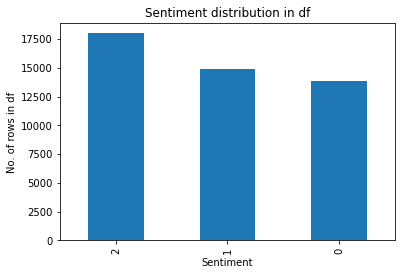

In [22]:
print("Number of rows per star rating:")
print(df_cleaned['sentiment'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df_cleaned['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()